1D


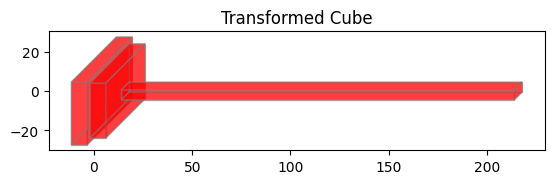

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from math import cos, sin

#              z   x   y      
output_shape = [2, 8, 32, 32]
output_shape2 = [8, 28, 28]
output_shape3 = [200]

def map_layer(output_shape, angle: float = 3.14/4, offset: int = 0, offset_optional: int = 0):
    """
    Maps the shape of a layer in a neural network to a set of coordinates for visualization.

    Parameters:
    - output_shape (tuple): The shape of the layer's output tensor.
    - angle (float): The angle (in radians) at which the layer should be tilted.
    - offset (int): The offset value for the layer's coordinates.
    - offset_optional (int): An optional offset value to add to the maximum z-coordinate of the mapped layer.
   
    Returns:
    - mapped_layer (ndarray): An array of coordinates representing the mapped layer.
    - offset (int): The updated offset value.

    """
    mapped_layer = []
    vertices = []
    if len(output_shape) == 4:
        output_shape = output_shape[1:] # Drop batch size

    if len(output_shape) == 3: # 3D
        x_h = round(output_shape[1]*cos(angle))
        x_v = round(output_shape[1]*sin(angle))
        z = output_shape[0]
        y = output_shape[2]
    elif len(output_shape) == 1: # 1D -> Fully Connected
        print("1D")
        z = output_shape[0]
        y = 5
        x_h = round(y*cos(angle))
        x_v = round(y*sin(angle))
    
    vertices = [
            [offset - x_h/2, -y/2 - x_v/2], # Front bottom left
            [offset + z - x_h/2, -y/2 - x_v/2], # Front bottom right
            [offset + z - x_h/2, y/2 - x_v/2], # Front top right
            [offset - x_h/2, y/2 - x_v/2], # Front top left
            [offset + x_h/2, -y/2 + x_v/2], # Back bottom left
            [offset + z + x_h/2, -y/2 + x_v/2], # Back bottom right
            [offset + z + x_h/2, y/2 + x_v/2], # Back top right
            [offset + x_h/2, y/2 + x_v/2], # Back top left
        ]
    mapped_layer = [
        [vertices[0], vertices[1], vertices[2], vertices[3], vertices[0]], # Front face
        [vertices[4], vertices[5], vertices[6], vertices[7], vertices[4]], # Back face
        [vertices[0], vertices[4], vertices[7], vertices[3], vertices[0]], # Left face
        [vertices[1], vertices[5], vertices[6], vertices[2], vertices[1]], # Right face
        [vertices[3], vertices[7], vertices[6], vertices[2], vertices[3]], # Top face
        [vertices[0], vertices[4], vertices[5], vertices[1], vertices[0]], # Bottom face
    ]
    mapped_layer = np.array(mapped_layer).reshape(-1, 5, 2)
    offset += z + offset_optional
    # print('Offset: ', offset, '. Vertices\n', vertices)
    return mapped_layer, offset


mapped_layer, offset = map_layer(output_shape)
mapped_layer2, offset2 = map_layer(output_shape2, offset=offset)
mapped_layer3, offset3 = map_layer(output_shape3, offset=offset2)

plt.gca().set_aspect('equal', adjustable='box')

for i, face in enumerate(mapped_layer):
    plt.fill(mapped_layer[i, :, 0], mapped_layer[i, :, 1], alpha=0.5, color='red', edgecolor='gray')

for i, face in enumerate(mapped_layer2):
    plt.fill(mapped_layer2[i, :, 0], mapped_layer2[i, :, 1], alpha=0.5, color='red', edgecolor='gray')
for i, face in enumerate(mapped_layer3):
    plt.fill(mapped_layer3[i, :, 0], mapped_layer3[i, :, 1], alpha=0.5, color='red', edgecolor='gray')

plt.title('Transformed Cube')
plt.show()
